# CAPE, total cloud cover, large scale precip, accumulated precip 1980-2020

In [1]:
%matplotlib inline
import sys

import numpy as np
import netCDF4 as nc
import numpy.matlib
import datetime
import xarray as xr
from scipy import interpolate
from numpy import ma
from scipy import stats
import scipy.io as sio
import pickle as pickle
from sklearn import linear_model
import numpy.ma as ma
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing

import scipy as sp
import pandas as pd

import time

from copy import copy 

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker

from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.axes_divider import HBoxDivider
import mpl_toolkits.axes_grid1.axes_size as Size
from mpl_toolkits.axes_grid1 import make_axes_locatable

# OS interaction
import os
import sys
import cftime

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

import matplotlib.colors as mcolors

import glob
import dask
import dask.bag as db

from scipy import interpolate

import statsmodels.stats.multitest as multitest

from matplotlib.gridspec import GridSpec
from cartopy.crs import EqualEarth, PlateCarree

# Set Path to ERA5 data and variables to choose

In [4]:
era5_path = '/glade/campaign/collections/rda/data/ds633.0/'

In [5]:
varlistnames = ['CAPE','total cloud cover','large scale rain rate',
                'accumulated large scale precipitation']
varlistinst = ['cape', 'tcc']
varlistacc = ['lsrr', 'lsp']

In [22]:
# set months and years to loop through
months = ['06', '07', '08']  # June, July, August
years = list(range(1980, 2020))  # 1980 to 2019

capedir = 'e5.oper.an.sfc'
tccdir = 'e5.oper.an.sfc'
lsrrdir = 'e5.oper.fc.sfc.instan'
lspdir = 'e5.oper.fc.sfc.accumu'

# Create an empty list to store datasets
dsinst_list = []
dsacc_list = []

# Iterate over years and months
for year in years:
    for month in months:
        
        # Try to load files for the current month and year
        try:
            # Form the directory path pattern
            cape_path = era5_path + f'{capedir}/{year}{month}/*cape*.nc'
            tcc_path = era5_path + f'{tccdir}/{year}{month}/*tcc*.nc'
            lsrr_path = era5_path + f'{lsrrdir}/{year}{month}/*lsrr*.nc'
            lsp_path = era5_path + f'{lspdir}/{year}{month}/*lsp*.nc'
            
            capefiles = glob.glob(cape_path)
            capefiles.sort()
            
            tccfiles = glob.glob(tcc_path)
            tccfiles.sort()

            lsrrfiles = glob.glob(lsrr_path)
            lsrrfiles.sort()

            lspfiles = glob.glob(lsp_path)
            lspfiles.sort()

            # Open and merge datasets
            ds_tempcape = xr.open_mfdataset(capefiles)
            dsinst_list.append(ds_tempcape)

            ds_temptcc = xr.open_mfdataset(tccfiles)
            dsinst_list.append(ds_temptcc)

            ds_templsrr = xr.open_mfdataset(lsrrfiles)
            dsacc_list.append(ds_templsrr)

            ds_templsp = xr.open_mfdataset(lspfiles)
            dsacc_list.append(ds_templsp)
        
        except Exception as e:
            print(f"Error in path: {e}")
    print(f'year: {year}')
# Merge all datasets in the list
dsinst = xr.merge(dsinst_list)
dsacc = xr.merge(dsacc_list)

year: 1980
year: 1981
year: 1982
year: 1983
year: 1984
year: 1985
year: 1986
year: 1987
year: 1988
year: 1989
year: 1990
year: 1991
year: 1992
year: 1993
year: 1994
year: 1995
year: 1996
year: 1997
year: 1998
year: 1999
year: 2000
year: 2001
year: 2002
year: 2003
year: 2004
year: 2005
year: 2006
year: 2007
year: 2008
year: 2009
year: 2010
year: 2011
year: 2012
year: 2013
year: 2014
year: 2015
year: 2016
year: 2017
year: 2018
year: 2019


/glade/u/home/zcleveland/.conda/envs/mland_xr/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/u/home/zcleveland/.conda/envs/mland_xr/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

KeyboardInterrupt: 

In [7]:
ds_list = []

for var in varlistinst: # cape and tcc
    print(var)
    
    files = glob.glob(era5_path + 'e5.oper.an.sfc/' + #'e5.oper.fc.sfc.accumu/' +
                      '200?06' + '/*'+var+'*.nc')
    files.sort
    
    # print(files)
    
    ds_temp = xr.open_mfdataset(files)
    #print(ds_temp)
    
    ds_list.append(ds_temp)
    
dsinst = xr.merge(ds_list)

ds_list = []

# lssr
print('lsrr')
files = glob.glob(era5_path + 'e5.oper.fc.sfc.instan/' + '200?06' + '/*' + 'lsrr' + '*.nc')

# Sort the files list
files.sort()

# Open and merge the datasets
ds_temp = xr.open_mfdataset(files)
ds_list.append(ds_temp)

# lsp
print('lsp')
files = glob.glob(era5_path + 'e5.oper.fc.sfc.accumu/' + '200?06' + '/*' + 'lsp' + '*.nc')

# Sort the files list
files.sort()

# Open and merge the datasets
ds_temp = xr.open_mfdataset(files)
ds_list.append(ds_temp)

# Merge all datasets in the list
dsacc = xr.merge(ds_list)   

cape
tcc
lsrr
lsp


In [8]:
# grab land/sea mask for data
lsm = xr.open_mfdataset('/glade/campaign/collections/rda/data/ds633.0/'+
                        'e5.oper.invariant/197901/'+
                        'e5.oper.invariant.128_172_lsm.ll025sc.1979010100_1979010100.nc')

In [9]:
print(list(dsinst.variables))
print(list(dsacc.variables))

['CAPE', 'latitude', 'longitude', 'time', 'utc_date', 'TCC']
['LSRR', 'forecast_hour', 'forecast_initial_time', 'latitude', 'longitude', 'utc_date', 'LSP', 'LSPF']


# Inspect our dataset and see what's inside

In [ ]:
dsinst

In [12]:
dsacc

<xarray.Dataset>
Dimensions:                (forecast_initial_time: 600, forecast_hour: 12,
                            latitude: 721, longitude: 1440)
Coordinates:
  * forecast_hour          (forecast_hour) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * forecast_initial_time  (forecast_initial_time) datetime64[ns] 2000-06-01T...
  * latitude               (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude              (longitude) float64 0.0 0.25 0.5 ... 359.5 359.8
Data variables:
    LSRR                   (forecast_initial_time, forecast_hour, latitude, longitude) float32 dask.array<chunksize=(30, 12, 721, 1440), meta=np.ndarray>
    utc_date               (forecast_initial_time) int32 dask.array<chunksize=(30,), meta=np.ndarray>
    LSP                    (forecast_initial_time, forecast_hour, latitude, longitude) float32 dask.array<chunksize=(30, 12, 721, 1440), meta=np.ndarray>
    LSPF                   (forecast_initial_time, forecast_hour, latitude, longitude) float32 dask.array<chunksize=(30, 12, 721, 1440), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.3
    CONVERSION_PLATFORM:  Linux r1i5n14 4.12.14-94.41-default #1 SMP Wed Oct ...
    CONVERSION_DATE:      Fri Jul 26 20:21:26 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Jul 26 20:21:34 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

# Subset the data for the southwest region

In [20]:
dsinst_sw = dsinst.sel(time=[0,6000], latitude=slice(45, 20), longitude=slice(238, 264), drop=True)
dsacc_sw = dsacc.sel(latitude=slice(45, 20), longitude=slice(238, 264), drop=True)

lsm_sw = lsm.sel(latitude=slice(45, 20), longitude=slice(238, 264), drop=True)

KeyError: "not all values found in index 'time'"

In [14]:
dsinst_sw

<xarray.Dataset>
Dimensions:    (time: 7200, latitude: 101, longitude: 105)
Coordinates:
  * latitude   (latitude) float64 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 238.0 238.2 238.5 238.8 ... 263.5 263.8 264.0
  * time       (time) datetime64[ns] 2000-06-01 ... 2009-06-30T23:00:00
Data variables:
    CAPE       (time, latitude, longitude) float32 dask.array<chunksize=(720, 101, 105), meta=np.ndarray>
    utc_date   (time) int32 dask.array<chunksize=(720,), meta=np.ndarray>
    TCC        (time, latitude, longitude) float32 dask.array<chunksize=(720, 101, 105), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.3
    CONVERSION_PLATFORM:  Linux r1i4n2 4.12.14-94.41-default #1 SMP Wed Oct 3...
    CONVERSION_DATE:      Fri Jul 26 20:45:04 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Jul 26 20:45:19 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [15]:
dsacc_sw

<xarray.Dataset>
Dimensions:                (forecast_initial_time: 600, forecast_hour: 12,
                            latitude: 101, longitude: 105)
Coordinates:
  * forecast_hour          (forecast_hour) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * forecast_initial_time  (forecast_initial_time) datetime64[ns] 2000-06-01T...
  * latitude               (latitude) float64 45.0 44.75 44.5 ... 20.25 20.0
  * longitude              (longitude) float64 238.0 238.2 238.5 ... 263.8 264.0
Data variables:
    LSRR                   (forecast_initial_time, forecast_hour, latitude, longitude) float32 dask.array<chunksize=(30, 12, 101, 105), meta=np.ndarray>
    utc_date               (forecast_initial_time) int32 dask.array<chunksize=(30,), meta=np.ndarray>
    LSP                    (forecast_initial_time, forecast_hour, latitude, longitude) float32 dask.array<chunksize=(30, 12, 101, 105), meta=np.ndarray>
    LSPF                   (forecast_initial_time, forecast_hour, latitude, longitude) float32 dask.array<chunksize=(30, 12, 101, 105), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.3
    CONVERSION_PLATFORM:  Linux r1i5n14 4.12.14-94.41-default #1 SMP Wed Oct ...
    CONVERSION_DATE:      Fri Jul 26 20:21:26 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Jul 26 20:21:34 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [16]:
lsm_sw

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 101, longitude: 105)
Coordinates:
  * latitude   (latitude) float64 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 238.0 238.2 238.5 238.8 ... 263.5 263.8 264.0
  * time       (time) datetime64[ns] 1979-01-01
Data variables:
    LSM        (time, latitude, longitude) float32 dask.array<chunksize=(1, 101, 105), meta=np.ndarray>
    utc_date   (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper04 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Mon May 13 18:10:35 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Mon May 13 18:10:35 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.4 (http://nco.sf.net)

# Load the data

In [17]:
tic = time.perf_counter()

dsinst_sw.load()
dsacc_sw.load()

toc = time.perf_counter()

print(f"Time to load: {toc - tic:0.4f} seconds")

Time to load: 388.1359 seconds


# Plot 2-D map of first time slice 1st Var

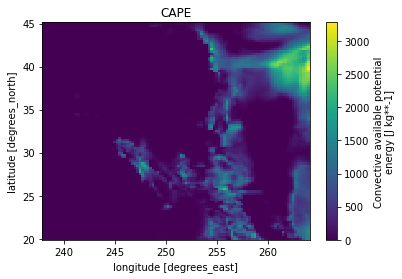

In [25]:
# cape
#lsm_sw.LSM.isel(time=0).plot()
dsinst_sw.CAPE.isel(time=0).plot()

# 
plt.title('CAPE')
plt.show()
plt.close()


# Plot 2-D map of first time slice 2nd Var

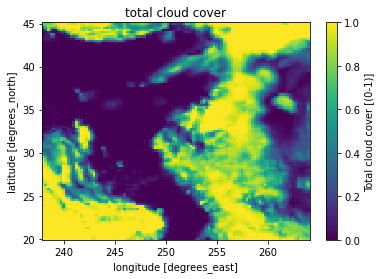

In [26]:
# total cloud cover
dsinst_sw.TCC.isel(time=0).plot()

# 
plt.title('total cloud cover')
plt.show()
plt.close()


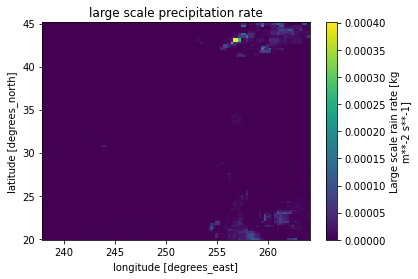

In [27]:
# large scale precipitation
dsacc_sw.LSRR.isel(forecast_initial_time=0,forecast_hour=0).plot()

# 
plt.title('large scale precipitation rate')
plt.show()
plt.close()

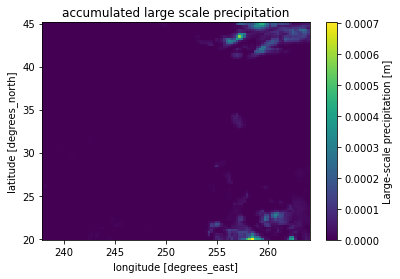

In [28]:
# accumulated precipitation
dsacc_sw.LSP.isel(forecast_initial_time=0, forecast_hour=0).plot()

# 
plt.title('accumulated large scale precipitation')
plt.show()
plt.close()

# Plot just the days in June

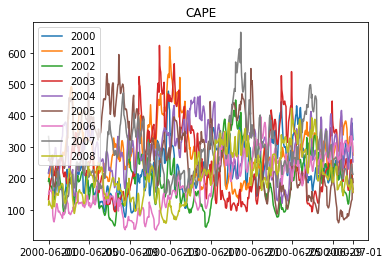

In [29]:
# get just the days of june to make the x-axis
june_days = dsinst_sw.where(dsinst_sw['time'].dt.year.isin([2000]), drop=True).time

for year in range(2000, 2009):
    
    ds_year = dsinst_sw.where(dsinst_sw['time'].dt.year.isin([year]), drop=True)
    plt.plot(june_days, ds_year.CAPE.mean(['latitude', 'longitude']), label=year)

plt.title('CAPE')
plt.legend()
plt.show()
plt.close()


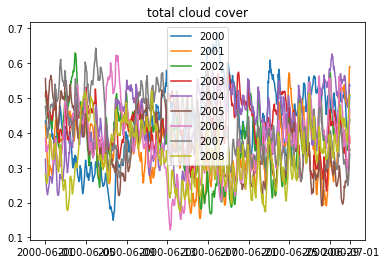

In [31]:
# get just the days of june to make the x-axis
june_days = dsinst_sw.where(dsinst_sw['time'].dt.year.isin([2000]), drop=True).time

for year in range(2000, 2009):
    
    ds_year = dsinst_sw.where(dsinst_sw['time'].dt.year.isin([year]), drop=True)
    plt.plot(june_days, ds_year.TCC.mean(['latitude', 'longitude']), label=year)

plt.title('total cloud cover')

plt.legend()
plt.show()
plt.close()


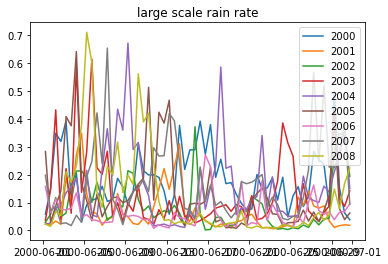

In [39]:
# get just the days of june to make the x-axis
june_days = dsacc_sw.where(dsacc_sw['forecast_initial_time'].dt.year.isin([2000]), drop=True).forecast_initial_time

for year in range(2000, 2009):

    ds_year = dsacc_sw.mean(dim='forecast_hour').where(dsacc_sw['forecast_initial_time'].dt.year.isin([year]), drop=True)
    plt.plot(june_days, 3600*12*ds_year.LSRR.mean(['latitude', 'longitude']), label=year)
        # *3600*12 to convert mm/s to mm/12hr

plt.title('large scale rain rate')

plt.legend()
plt.show()
plt.close()


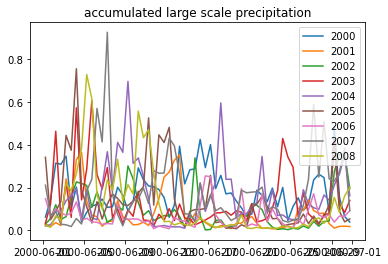

In [44]:
# get just the days of june to make the x-axis
june_days = dsacc_sw.where(dsacc_sw['forecast_initial_time'].dt.year.isin([2000]), drop=True).forecast_initial_time

for year in range(2000, 2009):
    
    ds_year = dsacc_sw.sum(dim="forecast_hour").where(dsacc_sw['forecast_initial_time'].dt.year.isin([year]), drop=True)
    plt.plot(june_days, 1000*ds_year.LSP.mean(['latitude', 'longitude']), label=year)
        # *1000 to convert m to mm

plt.title('accumulated large scale precipitation')
plt.legend()
plt.show()
plt.close()
